In [0]:
## for access of files using google drive

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

downloaded = drive.CreateFile({'id':"1I47En66HVQoNONtb7c5iJFeYdCwUYBWo"})   #  id of file you want to access
downloaded.GetContentFile('123.jpg')        # file name

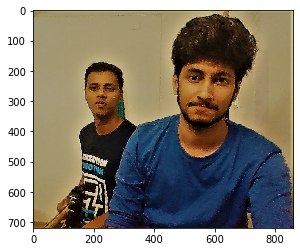

In [0]:
#importing libraries

import numpy as np
from matplotlib import image
from matplotlib import pyplot

#importing colored image

img = image.imread('123.jpg')        # load image as pixel array
pyplot.imshow(img)                   # Display the image on the axes

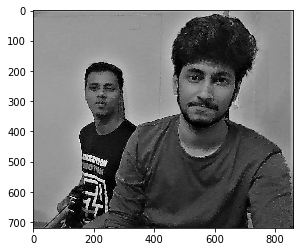

In [0]:
#converting RGB image to grayScale

bwimg=np.zeros([img.shape[0],img.shape[1]],img.dtype)   # Grayscale image as pixel array

for i in range(0,img.shape[0]):
    for j in range(0,img.shape[1]):
        bwimg[i,j]=round(0.33*img[i,j,0]+0.33*img[i,j,1]+0.33*img[i,j,2]);

pyplot.imshow(bwimg,cmap='gray')                        # Display Grayscale image on the axes


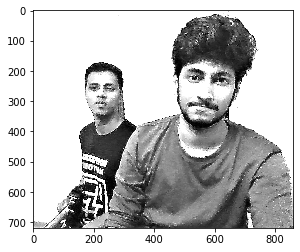

In [0]:
#Brighting the grayScale image (by adding 150 value to each pixel)

brightimg=np.zeros([img.shape[0],img.shape[1]],img.dtype)   # Brightened image as pixel array

for i in range(0,img.shape[0]):
    for j in range(0,img.shape[1]):
        if bwimg[i,j]>(255-150):
          brightimg[i,j]=255;
        else:
           brightimg[i,j]= bwimg[i,j]+150;

pyplot.imshow(brightimg,cmap='gray')                        # Display Brightened image on the axes


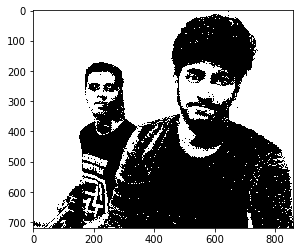

In [0]:
#Thresholding of image

threshold=75

thimg=np.zeros([img.shape[0],img.shape[1]],img.dtype)    # Threshold output image as pixel array

for i in range(0,img.shape[0]):
    for j in range(0,img.shape[1]):
        if(bwimg[i,j]>threshold): thimg[i,j]=255;
        else : thimg[i,j]=0;
pyplot.imshow(thimg,cmap='gray')                        # Display image after thresholding on the axes

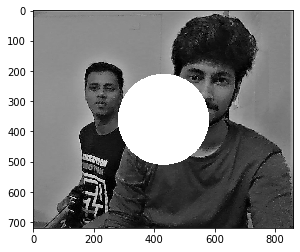

In [0]:
#circle on the center of image

import math
import numpy as np

img2=np.zeros([img.shape[0],img.shape[1]],img.dtype)            # circled image as pixel array

center=[round(img.shape[0]/2),round(img.shape[1]/2)]            # finding center of image

for i in range(0,img.shape[0]):
    for j in range(0,img.shape[1]):
        dis=math.sqrt((center[0]-i)*(center[0]-i)+(center[1]-j)*(center[1]-j))   #distance from center of image
        if(dis<150):
            img2[i,j]=255;
        else :
            img2[i,j]=bwimg[i,j];
        
pyplot.imshow(img2,cmap='gray')                                 # Display output image on the axes

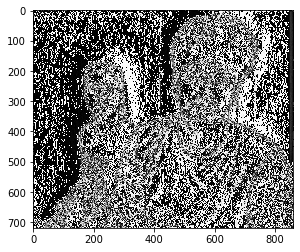

In [0]:
# sobel filtering 
sobel=[[-1,0,1],[-2,0,2],[-1,0,1]]

filterimg=np.zeros([img.shape[0],img.shape[1]],img.dtype)

for i in range(1,img.shape[0]-1):
  for j in range(1,img.shape[1]-1):
    temp1=sobel[0][0]*bwimg[i-1][j-1]+sobel[0][1]*bwimg[i-1][j]+sobel[0][2]*bwimg[i-1][j+1]
    temp2=sobel[1][0]*bwimg[i][j-1]+sobel[1][1]*bwimg[i][j]+sobel[1][2]*bwimg[i][j+1]
    temp3=sobel[2][0]*bwimg[i+1][j-1]+sobel[2][1]*bwimg[i+1][j]+sobel[2][2]*bwimg[i+1][j+1]
    total=temp1+temp2+temp3
    filterimg[i,j]=total
pyplot.imshow(filterimg,cmap='gray')
